In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import optimize

In [6]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

month_label = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

x_data_years = np.arange(1994,2023)

In [7]:
# Customize the default plotting style
plt.rcParams['figure.figsize'] = (8, 6)  # Set the default figure size
plt.rcParams['axes.labelsize'] = 14      # Set the default label font size
plt.rcParams['axes.titlesize'] = 16      # Set the default title font size
plt.rcParams['xtick.labelsize'] = 12     # Set the default x-axis tick font size
plt.rcParams['ytick.labelsize'] = 12     # Set the default y-axis tick font size
plt.rcParams['lines.linewidth'] = 2.0    # Set the default line width
plt.rcParams['lines.markersize'] = 8     # Set the default marker size
plt.rcParams['legend.fontsize'] = 12     # Set the default legend font size
plt.rcParams['axes.grid'] = True         # Enable grid lines by default

# Now, all subsequent plots in your script will use these settings


In [8]:
# data_dir = 'C:/Users/leonh/Desktop/Praktikum_AWI/Spitzbergen/data/alldata/'
# df_all = pd.DataFrame()
# # Erstellen Sie eine leere Liste, um DataFrames zu speichern
# #years = []



# #Schleife für die Monate
# for year in range(1994,2022):
#     dataframes = []
#     for month in range(1, 13):
#         file = f'NYA_cont_meteorology_{year}-{month:02d}.tab'
#         filename = data_dir + file

#         comment_lines = 0
#         with open(filename, 'r') as file:
#             for line in file:
#                 if line.startswith('*/'):
#                     break
#                 comment_lines += 1
#         # Erzeugen des Dateinamens
        

#         # Lesen der CSV-Datei für den aktuellen Monat
#         df = pd.read_csv(filename,  skiprows=comment_lines+1,sep='\t')
        
#         df['Date/Time'] = pd.to_datetime(df['Date/Time'])
#         # print('Zahlen der NaN-Einträge: '+str(np.sum(np.isnan(df['T2 [°C] (average, Thermometer)']))))
#         # df.loc[np.isnan(df['T2 [°C] (average, Thermometer)']),'T2 [°C] (average, Thermometer)'] = np.nanmean(df['T2 [°C] (average, Thermometer)'])
#         df_all = pd.concat((df_all, df), ignore_index= True)
#         # Fügen Sie den DataFrame zur Liste hinzu
#         #dataframes.append(df)
#     #years.append(dataframes.copy())







In [9]:
# df_backup = df_all.copy()


In [10]:
# df_all = df_backup.copy()

In [11]:

# df_all = df_all.drop(['Height [m]', 'T10 [°C] (average, Thermometer)', 'DD10 [deg] (average, Anemometer)', 'FF10 [m/s] (average, Anemometer)','DD2 [deg] (average, Anemometer)',
#                      'SWD OG1 [W/m**2] (average, Pyranometer)', 'SWD RG8 [W/m**2] (average, Pyranoameter)',
#                      'UV rad [W/m**2] (average, Total Ultraviolet Ra...)', 'SSD [min]',
#                     'T10 [°C]', 'DD10 [deg]', 'DD2 [deg]', 'FF2 [m/s]', 'SWD OG1 [W/m**2]', 'SWD RG8 [W/m**2]',
#                     'UV rad [W/m**2]', 'Elevation [m a.s.l.]'], axis= 1)


In [12]:
# columns_to_average = [
#     'PoPoPoPo [hPa]',
#     'PoPoPoPo [hPa] (average, Barometer)']

# # Calculate the row-wise mean for the selected columns
# df_all['PoPoPoPo'] = np.nanmean(df_all[columns_to_average], axis=1)

# df_all = df_all.drop(columns_to_average, axis = 1)

In [13]:
# columns_to_average = [
#     'RH [%] (average, redundant measuremen...)',
#     'RH [%] (average, redundant measuremen...).1',
#     'RH [%]',
#     'RH [%] (at 2 m height, average, redun...)',
#     'RH [%] (at 2 m height, average, redun...).1']

# columns_to_delete = [
#     'RH [%] (average, redundant measuremen...)',
#     'RH [%] (average, redundant measuremen...).1',
#     'RH [%] (at 2 m height, average, redun...)',
#     'RH [%] (at 2 m height, average, redun...).1']

# # Calculate the row-wise mean for the selected columns
# df_all['RH [%]'] = np.nanmean(df_all[columns_to_average], axis=1)

# df_all = df_all.drop(columns_to_delete, axis = 1)

In [14]:
# df_all.columns

In [15]:
# # Specify the list of column names to average
# columns_to_average = [
#     'T2 [°C] (average, Thermometer)',
#     'T2 [°C]',
#     'T2 [°C] (1-min average, Thermometer, T...)',
#     'T2 [°C] (1-min average; Sensor changed...)'
# ]

# # Calculate the row-wise mean for the selected columns
# df_all['T2'] = np.nanmean(df_all[columns_to_average], axis=1)


# df_all = df_all.drop(['T2 [°C] (average, Thermometer)', 'DD2 [deg] (average, Anemometer)','T2 [°C]','T2 [°C] (1-min average, Thermometer, T...)','T2 [°C] (1-min average; Sensor changed...)'], axis = 1)

In [16]:
# df_all.rename(columns = {'T2 [°C] (average, Thermometer)':'T2'}, inplace = True)

In [17]:
# df_all.columns

In [18]:
# df_all.to_csv('SB_df_all.csv')
df_all = pd.read_csv('SB_df_all.csv')
df_all['Date'] = pd.to_datetime(df_all['Date/Time'])

In [19]:
# df_month = pd.DataFrame(columns=[df_all.columns])

# for year in range(1983,2022):
#     for month in range(1, 13):
#         start_date = pd.to_datetime(f'{year}-{month:02d}')
#         if month < 12:
#             end_date = pd.to_datetime(f'{year}-{month+1:02d}')
#         else:
#             end_date = pd.to_datetime(f'{year+1}-01')
        # df_temp = np.nanmean(df_all.loc[df_all['Date/Time'] == slice(start_date, end_date), :], axis =1)

In [20]:
# import datetime

# # Create an empty DataFrame for daily aggregation
# df_days = pd.DataFrame(columns=['Date', 'T2Avg [°C]', 'T2Min [°C]', 'T2Max [°C]', 'RH [%]', 'Pres [hPa]'])

# # Extract year and month from the Date/Time column
# df_all['Year'] = df_all['Date/Time'].dt.year
# df_all['Month'] = df_all['Date/Time'].dt.month
# df_all['Day'] = df_all['Date/Time'].dt.day

# # Loop through the years, months, and days
# for year in range(1983, 2022):
#     for month in range(1, 13):
#         for day in range(1, 29):
#             # Filter the data for the current year, month, and day
#             filtered_data_day = df_all[(df_all['Year'] == year) & (df_all['Month'] == month) & (df_all['Day'] == day)]
            
#             if not filtered_data_day.empty:
#                 # Calculate the mean for each column in the filtered data
#                 temp_T2_avg = filtered_data_day['T2'].mean()
#                 temp_T2_min = filtered_data_day['T2'].min()
#                 temp_T2_max = filtered_data_day['T2'].max()
#                 temp_RH = filtered_data_day['RH [%]'].mean()
#                 temp_Pres = filtered_data_day['PoPoPoPo'].mean()
                
#                 # Calculate the date for the current day
#                 date = datetime.date(year, month, day)
                
#                 # Append the aggregated values to df_days
#                 df_days = df_days.append({'Date': date, 'T2Avg [°C]': temp_T2_avg, 'T2Min [°C]': temp_T2_min, 'T2Max [°C]': temp_T2_max, 'RH [%]': temp_RH, 'Pres [hPa]': temp_Pres}, ignore_index=True)
#     print(str(year))

# # Convert Date column to datetime type (if needed)
# df_days['Date'] = pd.to_datetime(df_days['Date'])

# df_days['DTR'] = np.subtract(df_days['T2Max [°C]'], df_days['T2Min [°C]'])

In [39]:

import datetime

# Group by date and calculate means for each column
df_all['Date'] = pd.to_datetime(df_all['Date/Time']).dt.date
agg_functions = {
    'T2': ['mean', 'min', 'max'],
    'RH [%]': 'mean',
    'PoPoPoPo': 'mean',
    'SSD [min] (average)': 'mean',
    'FF2 [m/s] (average, Anemometer)': 'mean'
}
df_days = df_all.groupby('Date').agg(agg_functions).reset_index()

# # Calculate DTR
# df_days['DTR'] = df_days['T2']['max'] - df_days['T2']['min']

# Rename columns for readability
df_days.columns = ['Date', 'T2Avg [°C]', 'T2Min [°C]', 'T2Max [°C]', 'RH [%]', 'Pres [hPa]', 'SSD [min]', 'FF2 [m/s]']

# Convert Date column to datetime type
df_days['Date'] = pd.to_datetime(df_days['Date'])

# Filter the date range if needed (optional)
# df_days = df_days[(df_days['Date'] >= '1983-01-01') & (df_days['Date'] <= '2021-12-31')]

df_days['DTR [°C]'] = df_days['T2Max [°C]'] - df_days['T2Min [°C]']

df_days['TempWind'] = df_days['T2Avg [°C]'] * df_days['FF2 [m/s]']

In [40]:
df_days['Date'] = pd.to_datetime(df_days['Date'])

# Set the 'Date' column as the index
df_days.set_index('Date', inplace=True)

# Resample the data to monthly intervals and calculate means for each column
df_monthly = df_days.resample('M').mean().reset_index()

print(df_monthly.columns)
# Rename columns for readability (if needed)
df_monthly.columns = ['Date', 'T2Avg [°C]', 'T2Min [°C]', 'T2Max [°C]', 'RH [%]', 'Pres [hPa]', 'SSD [min]', 'FF2 [m/s]', 'DTR [°C]', 'TempWind']

# Reset the 'Date' column to the original format (optional)
df_monthly['Date'] = df_monthly['Date'].dt.strftime('%Y-%m-%d')

# Print or save the new dataframe df_monthly
print(df_monthly)

Index(['Date', 'T2Avg [°C]', 'T2Min [°C]', 'T2Max [°C]', 'RH [%]',
       'Pres [hPa]', 'SSD [min]', 'FF2 [m/s]', 'DTR [°C]', 'TempWind'],
      dtype='object')
           Date  T2Avg [°C]  T2Min [°C]  T2Max [°C]     RH [%]   Pres [hPa]  \
0    1994-01-31  -14.820275  -18.806452  -11.877419  59.878589  1005.593848   
1    1994-02-28  -14.009454  -19.564286   -9.460714  72.761324  1011.482920   
2    1994-03-31   -9.952716  -14.583871   -6.867742  78.071688   997.041787   
3    1994-04-30   -6.821944  -10.736667   -4.233333  72.252229  1008.467122   
4    1994-05-31   -4.430975   -7.319355   -2.374194  76.092783  1015.038628   
..          ...         ...         ...         ...        ...          ...   
331  2021-08-31    5.543667    3.632258    7.503226  82.751706  1008.802174   
332  2021-09-30    3.781461    1.373333    5.853333  79.121369  1009.338424   
333  2021-10-31   -3.354489   -6.209677   -1.338710  72.788527  1010.403231   
334  2021-11-30   -9.565054  -14.173333   -6.9966

## Daily scatter plots

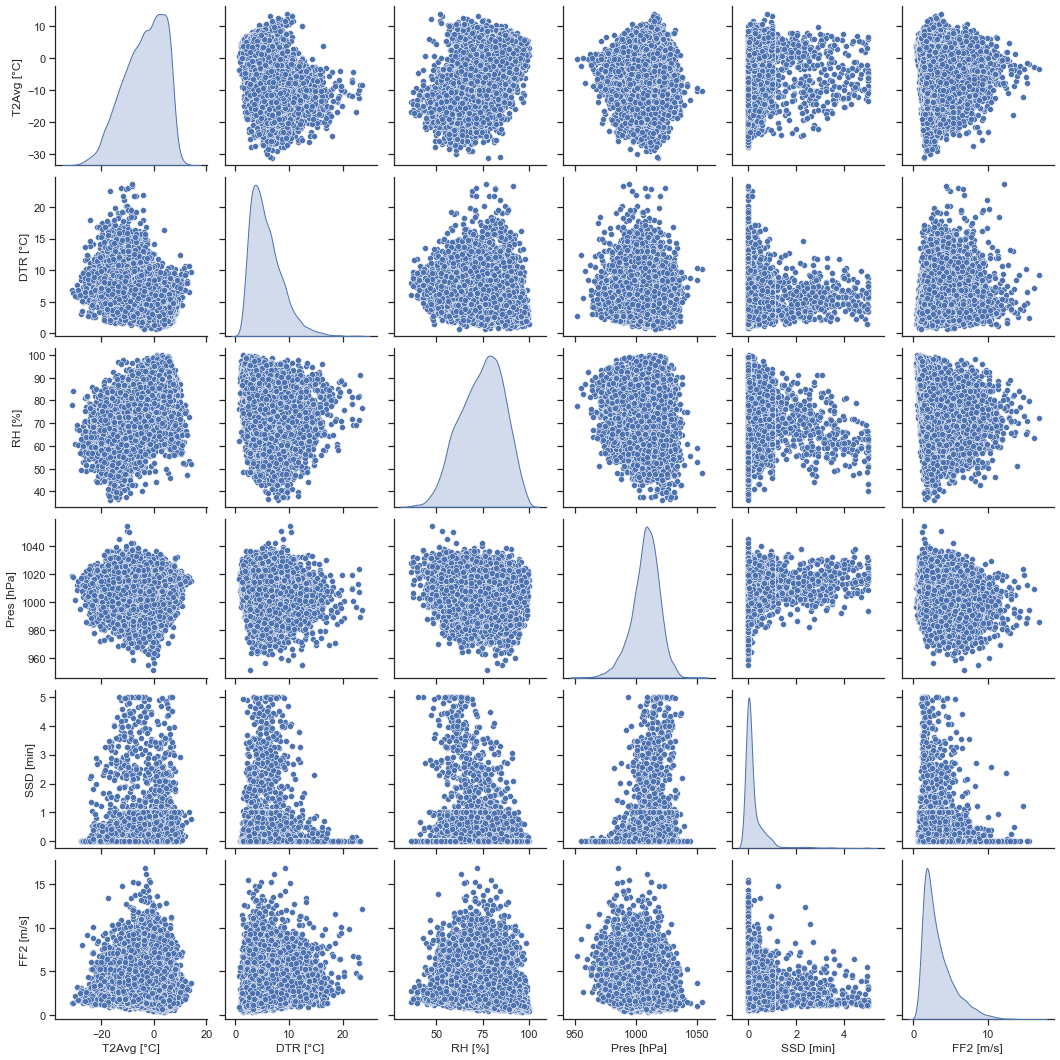

In [41]:
import seaborn as sns

# Assuming you have already loaded and prepared the df_days DataFrame as shown in the previous response

# Scatterplot matrix
sns.set(style="ticks")
sns.pairplot(df_days[['T2Avg [°C]', 'DTR [°C]', 'RH [%]', 'Pres [hPa]', 'SSD [min]', 'FF2 [m/s]']], diag_kind='kde') # 'T2Min [°C]', 'T2Max [°C]',
plt.show()

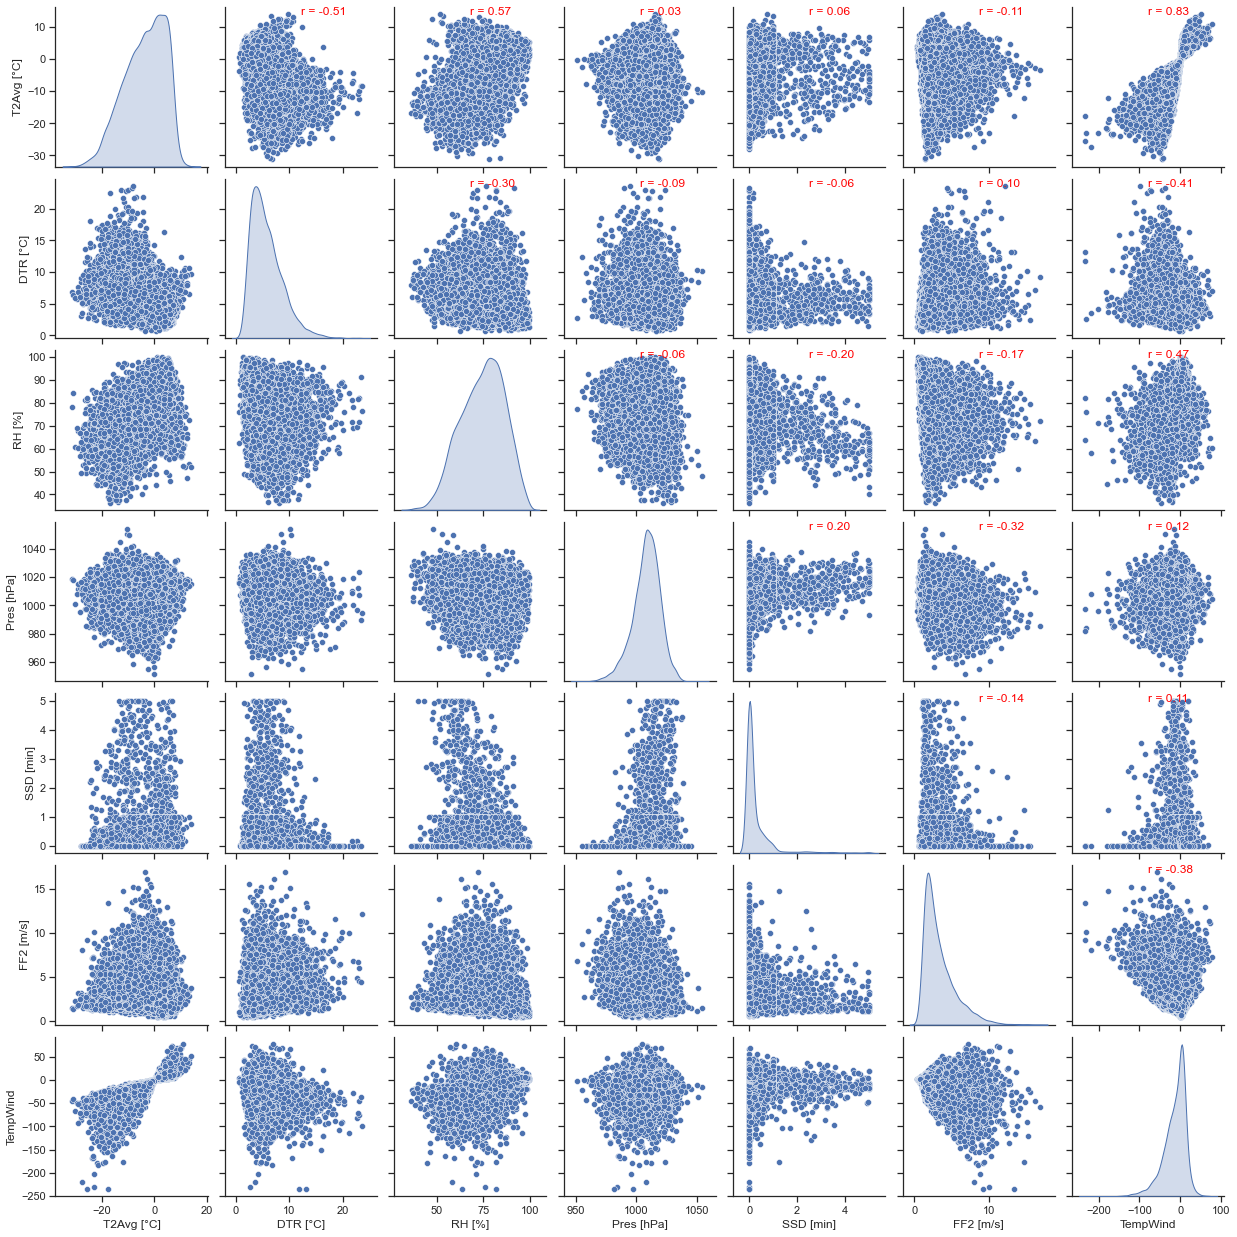

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np

# Assuming you have already loaded and prepared the df_days DataFrame as shown in the previous response

# Create a function to calculate and annotate correlations while ignoring NaN values
def calculate_and_annotate_correlation(x, y, **kwargs):
    valid_mask = ~np.logical_or(np.isnan(x), np.isnan(y))  # Create a mask for valid data points
    x_valid, y_valid = x[valid_mask], y[valid_mask]
    if len(x_valid) > 1:  # Check if there are enough valid data points for correlation
        corr_coef, _ = pearsonr(x_valid, y_valid)
        corr_text = f"r = {corr_coef:.2f}"
    else:
        corr_text = "r = NaN"
    ax = plt.gca()
    ax.annotate(corr_text, xy=(0.5, 0.95), xycoords=ax.transAxes, fontsize=12, color='red')

# Scatterplot matrix
sns.set(style="ticks")
g = sns.pairplot(df_days[['T2Avg [°C]', 'DTR [°C]', 'RH [%]', 'Pres [hPa]', 'SSD [min]', 'FF2 [m/s]', 'TempWind']], diag_kind='kde')

# Annotate correlations while ignoring NaN entries
g.map_upper(calculate_and_annotate_correlation)

# plt.savefig('SB_correlations_days.pdf')
# plt.savefig('SB_correlations_days.png', dpi = 300)
plt.show()


## Monthly scatter plots

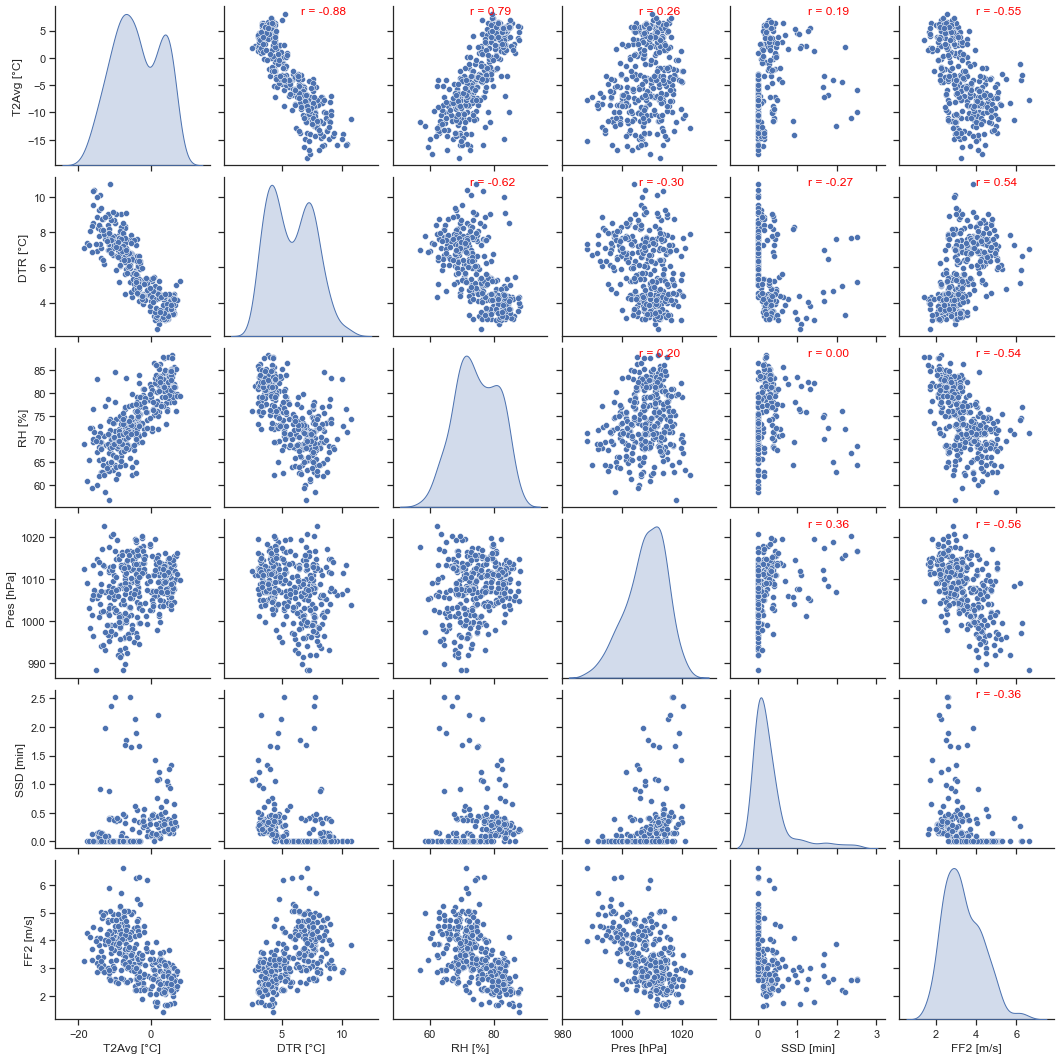

In [43]:
# Create a function to calculate and annotate correlations while ignoring NaN values
def calculate_and_annotate_correlation(x, y, **kwargs):
    valid_mask = ~np.logical_or(np.isnan(x), np.isnan(y))  # Create a mask for valid data points
    x_valid, y_valid = x[valid_mask], y[valid_mask]
    if len(x_valid) > 1:  # Check if there are enough valid data points for correlation
        corr_coef, _ = pearsonr(x_valid, y_valid)
        corr_text = f"r = {corr_coef:.2f}"
    else:
        corr_text = "r = NaN"
    ax = plt.gca()
    ax.annotate(corr_text, xy=(0.5, 0.95), xycoords=ax.transAxes, fontsize=12, color='red')

# Scatterplot matrix
sns.set(style="ticks")
g = sns.pairplot(df_monthly[['T2Avg [°C]', 'DTR [°C]', 'RH [%]', 'Pres [hPa]', 'SSD [min]', 'FF2 [m/s]']], diag_kind='kde')

# Annotate correlations while ignoring NaN entries
g.map_upper(calculate_and_annotate_correlation)
# plt.savefig('SB_correlations_month.pdf')
# plt.savefig('SB_correlations_month.png', dpi = 300)

plt.show()


### Binning


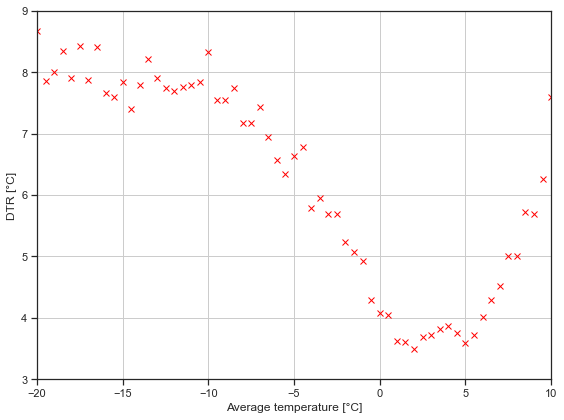

In [44]:
d = 0.5  # Adjust this value to your desired interval length

# Create bins for the 'x' values
df_days['bin'] = (df_days['T2Avg [°C]'] // d) * d

# Calculate the means of 'y' values in each bin
means_df = df_days.groupby('bin')['DTR [°C]'].mean().reset_index()

# Rename the columns for clarity
means_df.columns = ['TAvg_bin', 'DTR']

# Drop the 'bin' column if you don't need it
#means_df = means_df.drop(columns='bin')

# Print or use means_df as needed
plt.plot(means_df['TAvg_bin'], means_df['DTR'], marker = 'x', ls = '', color = 'red')

plt.xlim(-20,10)
plt.ylim(3,9)

plt.xlabel('Average temperature [°C]')
plt.ylabel('DTR [°C]')


plt.grid()

plt.tight_layout()

#plt.savefig('SB_DTR_binning.png', dpi = 300)

In [45]:
# import datetime 

# # Create an empty DataFrame for monthly aggregation
# df_month = pd.DataFrame(columns= ['Date', 'T2Avg [°C]', 'T2Min [°C]', 'T2Max [°C]', 'RH [%]', 'Pres [hPa]'])
# df_dates = pd.DataFrame(columns=['Date'])

# for year in range(1994, 2022):
#     for month in range(1, 13):
#         start_date = pd.to_datetime(f'{year}-{month:02d}')
#         if month < 12:
#             end_date = pd.to_datetime(f'{year}-{month+1:02d}')
#         else:
#             end_date = pd.to_datetime(f'{year+1}-01')
        
#         # Filter the data for the current month
#         filtered_data = df_all[(df_all['Date/Time'] >= start_date) & (df_all['Date/Time'] < end_date)]
        
#         day_min_month = []
#         day_max_month = []

#         for i in range (1, 29):
#             filtered_data_day = filtered_data[(filtered_data['Date/Time'] >=  start_date+ datetime.timedelta(days=i-1)) & (filtered_data['Date/Time'] < start_date+ datetime.timedelta(days=i))]
#             day_min = np.min(filtered_data_day['T2'])
#             day_max = np.max(filtered_data_day['T2'])
#             day_min_month.append(day_min)
#             day_max_month.append(day_max)


#         day_max_mean = np.nanmean(day_max_month)
#         day_min_mean = np.nanmean(day_min_month)
#         # Calculate the mean for each column in the filtered data
#         temp_T2 = np.nanmean(filtered_data['T2'])
#         temp_RH = np.nanmean(filtered_data['RH [%]'])
#         temp_Pres = np.nanmean(filtered_data['PoPoPoPo'])
        
#         temp_df = pd.DataFrame({'Date':[start_date], 'T2Avg [°C]': [temp_T2], 'T2Min [°C]': [day_min_mean], 'T2Max [°C]': [day_max_mean], 'RH [%]':[temp_RH], 'Pres [hPa]': [temp_Pres]})
#         df_month = pd.concat([df_month, temp_df], ignore_index= True)
        

In [46]:
# #df_month['Date'] = df_dates['Date']
# df_month['DTR'] = np.subtract(df_month['T2Max [°C]'], df_month['T2Min [°C]'])
# # df_month

In [47]:
#df_month.to_csv('Dataframe_Month_Averages.csv')
df_monthly['Date'] = pd.to_datetime(df_monthly['Date'])
type(df_monthly['Date'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [48]:
df_years = pd.DataFrame(columns= ['Date', 'T2Avg [°C]', 'T2Min [°C]', 'T2Max [°C]', 'DTR', 'RH [%]', 'Pres [hPa]'])


for year in range(1994, 2022):
        start_date = pd.to_datetime(f'{year}-01')
        end_date = pd.to_datetime(f'{year+1}-01')

        # Filter the data for the current month
        filtered_data = df_monthly[(df_monthly['Date'] >= start_date) & (df_monthly['Date'] < end_date)]




        day_max_mean = np.nanmean(filtered_data['T2Max [°C]'])
        day_min_mean = np.nanmean(filtered_data['T2Min [°C]'])
        temp_DTR = np.nanmean(filtered_data['DTR [°C]'])
        # Calculate the mean for each column in the filtered data
        temp_T2 = np.nanmean(filtered_data['T2Avg [°C]'])
        temp_RH = np.nanmean(filtered_data['RH [%]'])
        temp_Pres = np.nanmean(filtered_data['Pres [hPa]'])
        
        temp_df = pd.DataFrame({'Date':[start_date], 'T2Avg [°C]': [temp_T2], 'T2Min [°C]': [day_min_mean], 'T2Max [°C]': [day_max_mean],'DTR': [temp_DTR], 'RH [%]':[temp_RH], 'Pres [hPa]': [temp_Pres]})
        df_years = pd.concat([df_years, temp_df], ignore_index= True)
        

Create dataframes for each month

In [49]:
df_monthly['month'] = df_monthly['Date'].dt.month

# Initialize an empty dictionary to store sub DataFrames by month
monthly_data = {}

# Loop through each unique month
for month in range(1, 13):
    # Filter the DataFrame to get data for the current month
    monthly_data[month] = df_monthly[df_monthly['month'] == month]

# Now, monthly_data is a dictionary where each key represents a month (1 to 12),
# and the corresponding value is a DataFrame containing data for that month.

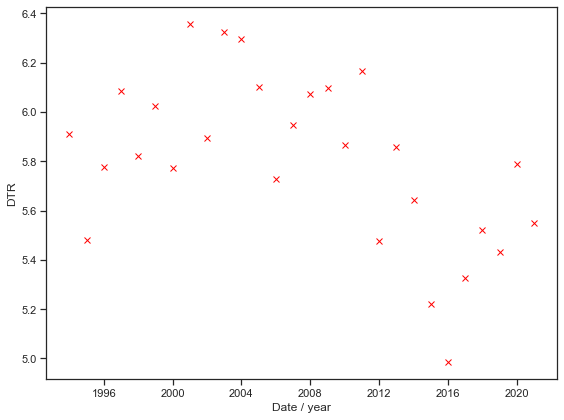

In [50]:
plt.plot(df_years['Date'], df_years['DTR'],ls  = '', marker = 'x',color =  'red')

plt.xlabel('Date / year')
plt.ylabel('DTR')

plt.tight_layout()

plt.savefig('SB_DTR_year.png', dpi = 300)

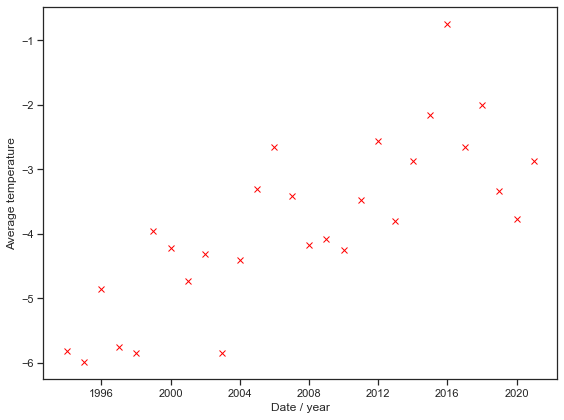

In [51]:
plt.plot(df_years['Date'], df_years['T2Avg [°C]'], ls  = '', marker = 'x',color =  'red')

plt.xlabel('Date / year')
plt.ylabel('Average temperature')

plt.tight_layout()

plt.savefig('SB_Date_T2Avg.png', dpi = 300)

In [52]:
plt.plot(df_month['Date'], df_month['DTR'])

NameError: name 'df_month' is not defined

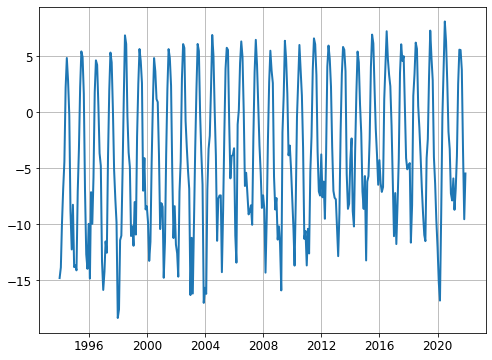

In [ ]:
plt.plot(df_month['Date'], df_month['T2Avg [°C]'])

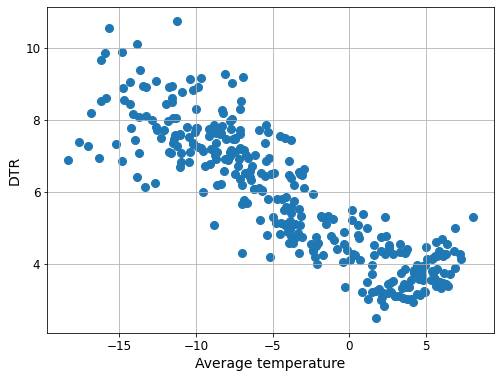

In [ ]:
plt.scatter(df_month['T2Avg [°C]'], df_month['DTR'])

plt.xlabel('Average temperature')
plt.ylabel('DTR')


plt.show()



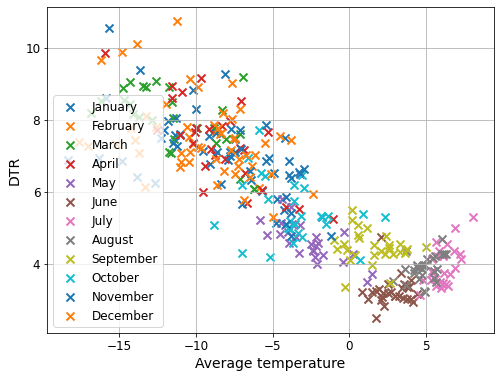

In [ ]:
for i in range(1,13):
    plt.scatter(monthly_data[i]['T2Avg [°C]'], monthly_data[i]['DTR'], marker = 'x', label = month_label[i-1])

plt.xlabel('Average temperature')
plt.ylabel('DTR')

plt.legend(loc = 3)

# plt.savefig('SB_DTR_T2Avg.png', dpi = 300)
plt.show()

In [ ]:
# for i in range(1,13):
#     plt.plot(monthly_data[i]['Date'], monthly_data[i]['T2Max [°C]'], marker = 'x', label = 'TMax')
#     plt.plot(monthly_data[i]['Date'], monthly_data[i]['T2Min [°C]'], ls = '--', marker = 'x', label = 'TMin')

#     plt.xlabel('Date')
#     plt.ylabel('Temperatur')
    
#     plt.title(month_label[i-1])
    
#     plt.legend()
    
#     plt.show()

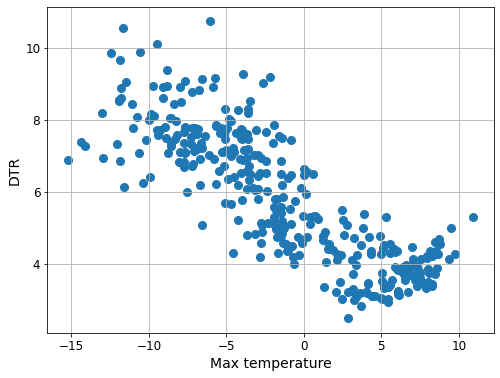

In [ ]:
plt.scatter(df_month['T2Max [°C]'], df_month['DTR'])

plt.xlabel('Max temperature')
plt.ylabel('DTR')


plt.show()

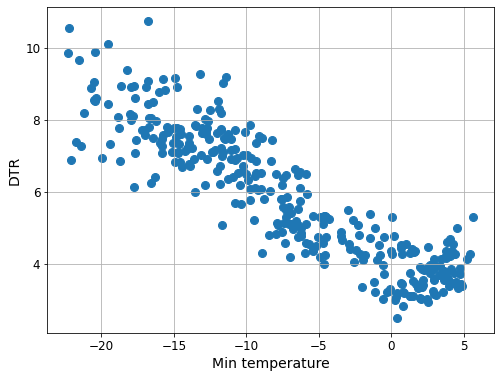

In [ ]:
plt.scatter(df_month['T2Min [°C]'], df_month['DTR'])

plt.xlabel('Min temperature')
plt.ylabel('DTR')


plt.show()

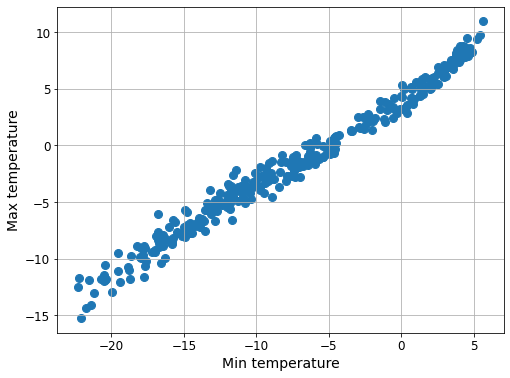

In [ ]:
plt.scatter(df_month['T2Min [°C]'], df_month['T2Max [°C]'])

plt.xlabel('Min temperature')
plt.ylabel('Max temperature')


plt.show()

Text(0, 0.5, 'T2Avg')

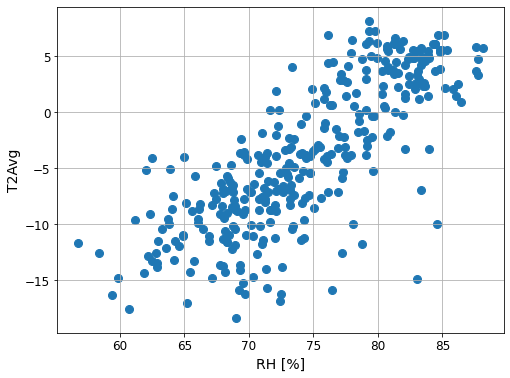

In [ ]:
plt.scatter(df_month['RH [%]'], df_month['T2Avg [°C]'])

plt.xlabel('RH [%]')
plt.ylabel('T2Avg [°C]')



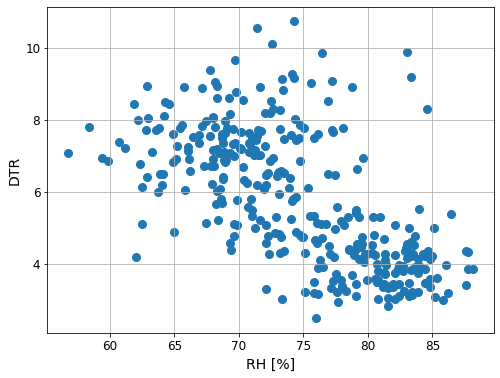

In [ ]:
plt.scatter(df_month['RH [%]'], df_month['DTR'])

plt.xlabel('RH [%]')
plt.ylabel('DTR')

#plt.savefig('SB_DTR_RH.png', dpi = 300)

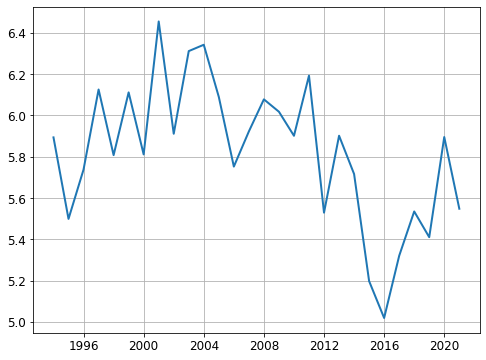

In [ ]:
plt.plot(df_years['Date'], df_years['DTR'])

(10696.0, 10699.0)

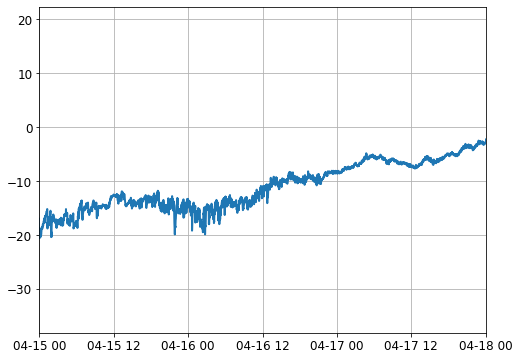

In [ ]:
plt.plot(df_all['Date/Time'], df_all['T2'])


plt.xlim(pd.to_datetime('1999-04-15'),pd.to_datetime('1999-04-18'))